In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import dates

import math
from astropy.time import Time


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
plt.style.use('seaborn-dark-palette')

In [4]:
jedi = pd.read_csv('jedi_v1.0.1.csv', low_memory=False)
# demon = pd.read_csv(demon)

In [5]:
jedi

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Pre-Flare Start Time,Pre-Flare End Time,Flare Interrupt,9.4 Pre-Flare Irradiance [W/m2],13.1 Pre-Flare Irradiance [W/m2],13.3 Pre-Flare Irradiance [W/m2],...,103.2 by 63.0 Fitting Score,103.2 by 71.9 Fitting Score,103.2 by 72.2 Fitting Score,103.2 by 77.0 Fitting Score,103.2 by 79.0 Fitting Score,103.2 by 83.6 Fitting Score,103.2 by 95.0 Fitting Score,103.2 by 97.3 Fitting Score,103.2 by 97.7 Fitting Score,103.2 by 102.6 Fitting Score
0,1.0,2010-05-04 16:15:00.000,2010-05-04 16:29:00.000,C3.6,2010-05-04 08:29:00.000,2010-05-04 16:29:00.000,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2010-05-05 07:09:00.000,2010-05-05 07:16:00.000,C2.3,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,True,0.000004,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2010-05-05 11:37:00.000,2010-05-05 11:52:00.000,C8.8,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,True,0.000004,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2010-05-05 17:13:00.000,2010-05-05 17:19:00.000,M1.2,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,False,0.000004,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2010-05-07 07:29:00.000,2010-05-07 07:42:00.000,C2.0,2010-05-06 23:42:00.000,2010-05-07 07:42:00.000,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,2010-05-08 04:51:00.000,2010-05-08 04:59:00.000,C9.3,2010-05-07 20:59:00.000,2010-05-08 04:59:00.000,True,NaN,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.329834,0.073395
6,7.0,2010-05-08 11:40:00.000,2010-05-08 11:50:00.000,C1.8,2010-05-07 20:59:00.000,2010-05-08 04:59:00.000,True,NaN,0.000002,NaN,...,0.373334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.126622,NaN
7,9.0,2010-06-12 00:30:00.000,2010-06-12 00:57:00.000,M2.0,2010-06-11 16:57:00.000,2010-06-12 00:57:00.000,True,NaN,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10.0,2010-06-12 03:57:00.000,2010-06-12 04:06:00.000,C1.0,2010-06-11 16:57:00.000,2010-06-12 00:57:00.000,True,NaN,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11.0,2010-06-12 09:02:00.000,2010-06-12 09:17:00.000,C6.1,2010-06-11 16:57:00.000,2010-06-12 00:57:00.000,True,NaN,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
jedi_no_times = jedi.select_dtypes(exclude=['object'])
#need to remove time objects as the imputer can't handle them.
imp = Imputer(strategy='mean')
#fills in nan with the mean of the column
jedi_no_times_f = imp.fit_transform(jedi_no_times)
jedi_no_times_fn = normalize(jedi_no_times_f)
#normalizes the data, makes sure we don't lose anything usefull because of scale
#fit the data to the model
model = PCA(n_components=2)
model.fit(jedi_no_times_fn)
jedi_2d = model.transform(jedi_no_times_fn)

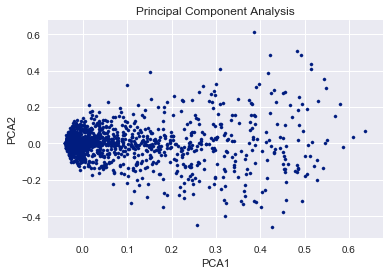

In [7]:
#plot the data using matplotlib, 
plt.scatter(jedi_2d[:, 0], jedi_2d[:, 1], s=10)
plt.xlabel('PCA1');
plt.ylabel('PCA2');
plt.title('Principal Component Analysis');


In [8]:
jedi

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Pre-Flare Start Time,Pre-Flare End Time,Flare Interrupt,9.4 Pre-Flare Irradiance [W/m2],13.1 Pre-Flare Irradiance [W/m2],13.3 Pre-Flare Irradiance [W/m2],...,103.2 by 63.0 Fitting Score,103.2 by 71.9 Fitting Score,103.2 by 72.2 Fitting Score,103.2 by 77.0 Fitting Score,103.2 by 79.0 Fitting Score,103.2 by 83.6 Fitting Score,103.2 by 95.0 Fitting Score,103.2 by 97.3 Fitting Score,103.2 by 97.7 Fitting Score,103.2 by 102.6 Fitting Score
0,1.0,2010-05-04 16:15:00.000,2010-05-04 16:29:00.000,C3.6,2010-05-04 08:29:00.000,2010-05-04 16:29:00.000,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2010-05-05 07:09:00.000,2010-05-05 07:16:00.000,C2.3,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,True,0.000004,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2010-05-05 11:37:00.000,2010-05-05 11:52:00.000,C8.8,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,True,0.000004,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2010-05-05 17:13:00.000,2010-05-05 17:19:00.000,M1.2,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,False,0.000004,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2010-05-07 07:29:00.000,2010-05-07 07:42:00.000,C2.0,2010-05-06 23:42:00.000,2010-05-07 07:42:00.000,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,2010-05-08 04:51:00.000,2010-05-08 04:59:00.000,C9.3,2010-05-07 20:59:00.000,2010-05-08 04:59:00.000,True,NaN,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.329834,0.073395
6,7.0,2010-05-08 11:40:00.000,2010-05-08 11:50:00.000,C1.8,2010-05-07 20:59:00.000,2010-05-08 04:59:00.000,True,NaN,0.000002,NaN,...,0.373334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.126622,NaN
7,9.0,2010-06-12 00:30:00.000,2010-06-12 00:57:00.000,M2.0,2010-06-11 16:57:00.000,2010-06-12 00:57:00.000,True,NaN,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10.0,2010-06-12 03:57:00.000,2010-06-12 04:06:00.000,C1.0,2010-06-11 16:57:00.000,2010-06-12 00:57:00.000,True,NaN,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,11.0,2010-06-12 09:02:00.000,2010-06-12 09:17:00.000,C6.1,2010-06-11 16:57:00.000,2010-06-12 00:57:00.000,True,NaN,0.000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
